Context
it is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase


---------------------------
Content;
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The datasets is higly imbalanced, the postivie class(frauds) account for 0.172% of all transactions.

it contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1,V2...V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

PCA has already be done on this dataset because it can not be shared like that.......

Inspiration.......
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


---------

Our ultimate intent is to tackle this situation by building classification models to classify and distinguish fraud transactions.

Why Classification? Classification is the process of predicting discrete variables (binary, Yes/no, etc.). Given the case, it will be more optimistic to deploy a classification model rather than any others.


STEP-1: Importing Libraries & Loading Datasets. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as style # for text customization

Loading Datasets

In [6]:
data = pd.read_csv("creditcard.csv", )
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


display max.column because some of the columns are neglected 

In [10]:
pd.options.display.max_columns = None 

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Jack to see the tail of the dataset ....

In [16]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [18]:
data.shape

(284807, 31)

In [20]:
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

Number of columns: 31
Number of rows: 284807


STEP-2: Data Preprocessing & Preparing Datasets.
checking for any missing values...

In [22]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [24]:
data.isnull().values.any()

False

Checking info of our datasets....

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Observing Statistical Distribution of Datasets...

In [28]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Dropping Time Attribute
It is of no use to build the models and may not impact our target varibales.....


In [30]:
# Drop 'Time' column if it exists, otherwise ignore
data.drop('Time', axis=1, inplace=True, errors='ignore')


Now X and y are dependent and independent features extracted from our normal datasets

In [33]:
X = data.drop('Class', axis=1)
y = data['Class']
X.shape, y.shape

((284807, 29), (284807,))

In [35]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Normalizing Amount attribute values using StandardScaler

In [39]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
standard = StandardScaler()

# Standardizing 'Amount' and keeping original values
data['Amount_scaled'] = standard.fit_transform(data['Amount'].values.reshape(-1, 1))

# Define feature set and target variable
X_scaled = data.drop('Class', axis=1)  # Keeping all columns except 'Class'
y_scaled = data['Class']  # Target variable

# Display the first few rows to check the results
print(data[['Amount', 'Amount_scaled']].head())

# Check the shapes
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y_scaled:", y_scaled.shape)


   Amount  Amount_scaled
0  149.62       0.244964
1    2.69      -0.342475
2  378.66       1.160686
3  123.50       0.140534
4   69.99      -0.073403
Shape of X_scaled: (284807, 30)
Shape of y_scaled: (284807,)


In [41]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


STEP- 3: Exploratoty Data Analysis(EDA) & Visualization.
Making data ready for Plotting of Count Values of Different Classes...

In [43]:
class_count_df = pd.DataFrame(data['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class']= class_count_df['Class'].replace({0:'Normal',
                                1:'Fraud'})
class_count_df.head()

,Class,Counts
0,Normal,284315
1,Fraud,492


# fig = plt.figure()
# fig.set_figheight(8)
# fit.set_figwidth(10)
# plt.bar(class_count_df)

BAR_GRAPH

<Figure size 1000x800 with 0 Axes>

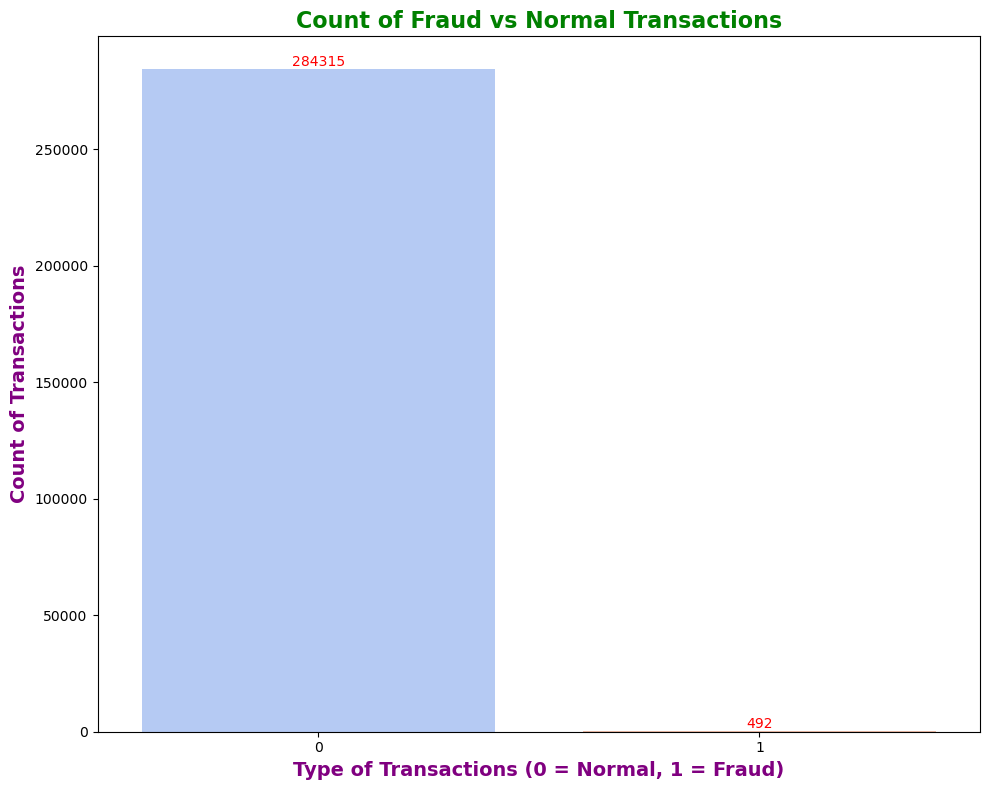

In [46]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

# Assuming your 'class_count_df' DataFrame looks like this after counting values
class_count_df = data['Class'].value_counts().reset_index()
class_count_df.columns = ['Class', 'Count']  # Ensure correct column names

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 8))  # Set figure size

# Plot using 'hue' and disable the legend
sns.barplot(x=class_count_df['Class'], y=class_count_df['Count'], hue=class_count_df['Class'], palette='coolwarm', ax=ax, dodge=False, legend=False)

# Adding value labels to the top of the bars for both fraud and normal transactions
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d', color='red')  # Show labels as integers

# Additional attributes
plt.xlabel('Type of Transactions (0 = Normal, 1 = Fraud)', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel('Count of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.title('Count of Fraud vs Normal Transactions', fontsize=16, fontweight='bold').set_color('green')

# Display the plot
plt.tight_layout()
plt.show()

Analyzing before plotting graph of Variation of Amount per Class

In [48]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]
fraud.shape, normal.shape

((492, 31), (284315, 31))

In [50]:
fraud_frc = len(fraud)/float(len(data))
fraud_frc

0.001727485630620034

In [52]:
print(f"Percentage of Fraud Tnx in datasets : {fraud_frc*100:.2f}%")

Percentage of Fraud Tnx in datasets : 0.17%


In [54]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [56]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

HISTOGRAM

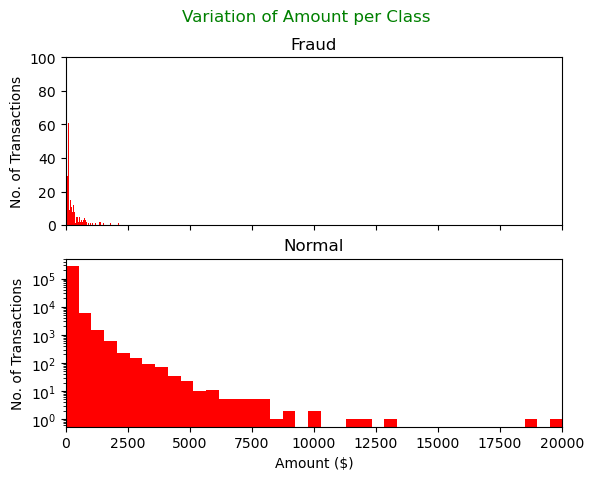

In [60]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

STEP-4: Handling Imbalanced Datasets.
Techniques to Handle Imbalanced Data For a Classification Problem
reference : https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

1) Choose Proper Evaluation Metrics
Accuracy may be good enough for a well-balanced class but not ideal for the imbalanced class problem. The other metrics like precision( measure of how accurate the classifier’s prediction of a specific class ) and recall ( measure of the classifier’s ability to identify a class ) are also considered.

For an imbalanced class dataset, F1 score is a more appropriate metric. F1 score is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance. F1-score ranges between 0 and 1. The closer it is to 1, the better the model.

2) Resampling(Undersampling and Oversampling)
OverSampling


In [62]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Oersampling.....

In [66]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
data_majority = data[(data['Class']==0)] 
data_minority = data[(data['Class']==1)]

# upsample minority class
data_minority_oversampled = resample(data_minority,
                                 replace=True,
                                 n_samples=275190,
                                 random_state=42)
# Combine majority class with upsampled minority class
data_oversampled = pd.concat([data_minority_oversampled, data_majority])
data_oversampled.Class.value_counts()

Class
0    284315
1    275190
Name: count, dtype: int64

Final Sampled Dataset:

In [68]:
X_oversampled = data_oversampled.drop('Class', axis=1)
y_oversampled = data_oversampled['Class']
X_oversampled.shape, y_oversampled.shape

((559505, 30), (559505,))

Undersampling.....

In [70]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Assuming 'data' is your full dataset and 'Class' is the target column
# Define X (features) and y (target)
X = data.drop('Class', axis=1)  # Drop the 'Class' column to get the features
y = data['Class']               # Define y as the 'Class' column (target)

# Random undersampling
rus = RandomUnderSampler(random_state=42)

# Resample the dataset to address class imbalance
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Print the class distribution before and after undersampling
print(f"The number of Classes before undersampling: {Counter(y)}")
print(f"The number of Classes after undersampling: {Counter(y_undersampled)}")


The number of Classes before undersampling: Counter({0: 284315, 1: 492})
The number of Classes after undersampling: Counter({0: 492, 1: 492})


3) SMOTE(Synthetic Minority Oversampling Technique)
   Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [72]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

X_smote, y_smote = sm.fit_resample(data.drop('Class', axis=1), data['Class'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

(568630, 30)

In [74]:
smote_df.Class.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

Context
it is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase


---------------------------
Content;
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The datasets is higly imbalanced, the postivie class(frauds) account for 0.172% of all transactions.

it contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1,V2...V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

PCA has already be done on this dataset because it can not be shared like that.......

Inspiration.......
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


---------

Our ultimate intent is to tackle this situation by building classification models to classify and distinguish fraud transactions.

Why Classification? Classification is the process of predicting discrete variables (binary, Yes/no, etc.). Given the case, it will be more optimistic to deploy a classification model rather than any others.


-------------------------------

Steps Involved
1 - Importing the required packages into our python environment(jupyter Notebook).
2 - Importing the data
3 - Processing the data to our needs and Exploratory Data Analysis
4 - Feature Selection and Data Split
5 - Building four types of classification models
6 - Evaluating the created classification models using the evaluation metrics

-------------------------------

We are using python for this project because it is really effortless to make use of a bunch of methods, has an extensive amount of packages for machine learning, and can be learned easily. In recent days, the job market for python is seamlessly higher than any other programming language and companies like Netflix are using python for data science and many other applications. With that, let’s dive into the coding part.

-----------------------------------------

Importing Data
About the data: The data we are going to use is the Kaggle Credit Card Fraud Detection dataset (click here for the dataset). It contains features V1 to V28 which are the principal components obtained by PCA. We are going to neglect the time feature which is of no use to build the models. The remaining features are the ‘Amount’ feature that contains the total amount of money being transacted and the ‘Class’ feature that contains whether the transaction is a fraud case or not.

Now let’s import the data using the ‘read_csv’ method and print the data to have a look at it in python.

----------------------------------------
checking for any missing values...
PRE-PROCESSSING FOR FRUAD 
Data Processing and EDA
Data Processing and EDA
Let’s have a look at how many fraud cases and non-fraud cases are there in our dataset. Along with that, let’s also compute the percentage of fraud cases in the overall recorded transactions. Let’s do it in python!


Techniques to Handle Imbalanced Data For a Classification Problem
reference : https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

Data cleaning; checking for any missing values...
1-Normal 
2-StandardScaling
3-undersampling
4-oversampling 
5-SMOTE(Synthetic Minority Oversampling Technique)- Simply adding duplicate records of minority class often don'd add any new information to the model. in SMOTE new instances are synthesized from the existing data. if we often explain it is simple words, SMOTE looks into minority class instances and use K nearest neighbor to select a random nearest neighbor, and a sythetic instance is created randomly in feature 

-------------------------------------------





Conclusions:
1- Out of the 4 Machine Learning Models used, Random Forest Classifier works efficiently with Maximum Accuracy of 99.996483% and macro-average of F1-Score of 1.00 acheived with Oversampling technique.

2- Oversampling Techniques proved to be efficient for handling Imbalanced Datasets.

3- RandomForest, XGBoost, DecisionTree work efficiently even for this Imbalanced Datasets.

4- RandomForest takes lots of Training Time among all of Four models used 

Further Enhancements.
1- I,ve used default hyperparameters during model instantiation. You can play with hyperparameters for improving its efficiency
1- You can apply other machine learning models as well.


Reference
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

https://medium.com/codex/credit-card-fraud-detection-with-machine-learning-in-python-ac7281991d87

https://www.youtube.com/watch?v=frM_7UMD_-A


Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project


Model Prediction
Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows